# Topic Modeling of COVID-19 Open Research Dataset
## - Finding Business topics for publications on COVID-19
Since the COVID-19 pandemic, academic society has published many papers about COVID-19, SARS-CoV-2, and related coronaviruses. The Allen Institute for AI prepared the COVID-19 Open Research Dataset (CORD-19), a resource of over 200,000 scholarly articles, including over 100,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses.

The objective of this code is to use the latent Dirichlet allocation (LDA), a popular text mining method for topic modeling, to find business insight in the massive amount of publications on COVID-19.

I will explore the following questions.
* What do we know about business topics associate with COVID-19?
* What do we know about the topics that combine business and biology, or business and health care?
* What has been published about information sharing and management?
* What has been published about social science that may impact business?


# 1. Read dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read metadata.csv downloaded from
https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

In [2]:
meta = pd.read_csv("../metadata.csv")
print(meta.shape)
meta.head()

C:\Users\zhipe\Anaconda3\envs\tm\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(341713, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


Check the variable names of the dataset.

In [3]:
print(meta.columns)

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')


Filter meta file by selecting only papers after 2020.

In [4]:
meta["publish_time"] = pd.to_datetime(meta["publish_time"])
meta["publish_year"] = pd.DatetimeIndex(meta['publish_time']).year
meta["publish_month"] = pd.DatetimeIndex(meta['publish_time']).month
meta["publish_day"] = pd.DatetimeIndex(meta['publish_time']).day
meta = meta[meta["publish_year"] == 2020]
print(meta.shape[0], " papers are available after 2020 Jan 1.")

247255  papers are available after 2020 Jan 1.


Plot publication numbers in each month of 2020.

<AxesSubplot:xlabel='publish_year,publish_month'>

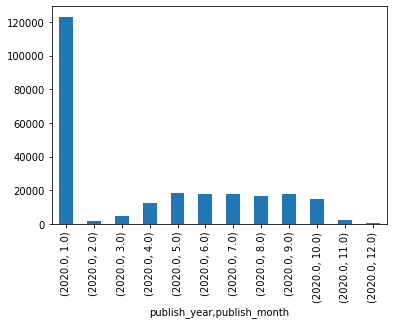

In [5]:
meta.groupby(["publish_year","publish_month"]).size().plot.bar()

* It is strange that most papers are published in the first month of 2020.
I plot the publication numbers in each day of 2020 Jan..

<AxesSubplot:xlabel='publish_day'>

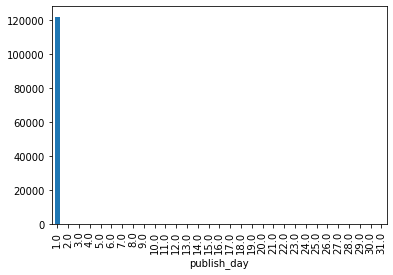

In [6]:
meta[(meta.publish_year==2020)&(meta.publish_month==1)].groupby(["publish_day"]).size().plot.bar()

* Most papers are published in Jan. 1st, 2020.
* I guess most papers in the dataset don't have exact publishing date and have benn marked 1/1/2020.

Create dataframe with all abstracts and use it as input corpus.
* Papers without abstract are dropped.

In [7]:
index = []
for i in range(len(meta)):
    if type(meta.iloc[i, 8]) != float:
        index.append(i)
docs = meta.iloc[index, 8]
print(docs.shape[0], "abstracts are collected.")

163820 abstracts are collected.


Document number is high. I sample 50,000 documents for reducing computing time.

In [8]:
samp_size = 50000 #Here, the size can be changed. 
samp_docs = docs.sample(n=samp_size,random_state=100)
samp_docs = samp_docs.reset_index(drop=True)
samp_docs.head()

0    BACKGROUND: Different skin manifestations of C...
1    SARS-CoV-2 is the cause of the worldwide outbr...
2    BACKGROUND: Multiple professional bodies have ...
3    Severe cases of COVID-19 are characterized by ...
4    The COVID-19 pandemic caused by the SARS-CoV-2...
Name: abstract, dtype: object

# 2. Preprocessing texts

Sentence level preprocess
* Lowercase + base filter
* Some basic normalization

In [9]:
import re
def preprocess_sent(docs):
    """
    Get sentence level preprocessed data from raw texts
    :param rw: review to be processed
    :return: sentence level pre-processed review
    """
    # Add missing delimiter: xxxThis is a --> xxx.
    s = re.sub(r'([a-z])([A-Z])', r'\1\. \2', docs)  # before lower case
    # Make words all lower case.
    s = s.lower()
    # Remove < and >
    s = re.sub(r'&gt|&lt', ' ', s)
    # Remove letters that repeat more than 2 time.
    s = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # Remove non-word characters that repeat more than 1 time.
    s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # Use string * as delimiter
    s = re.sub(r'\*|\W\*|\*\W', '. ', s)
    # Remove words in parenthesis, which are assumed less informal
    s = re.sub(r'\(.*?\)', '. ', s)
    # xxx[?!]. -- > xxx.
    s = re.sub(r'\W+?\.', '.', s)
    # [.?!]xxx --> [.?!] xxx
    s = re.sub(r'(\.|\?|!)(\w)', r'\1 \2', s)
    return s.strip()

text_lists = [preprocess_sent(text) for text in samp_docs]

 Word level preprocess

In [10]:
# define stemmer
import nltk
from nltk.stem.porter import *
p_stemmer = PorterStemmer()

# create stop words list
from stop_words import get_stop_words
stop_words = (list(
    set(get_stop_words('en'))
    |set(get_stop_words('es'))
    |set(get_stop_words('de'))
    |set(get_stop_words('it'))
    |set(get_stop_words('ca'))
    |set(get_stop_words('pt'))
    |set(get_stop_words('pl'))
    |set(get_stop_words('da'))
    |set(get_stop_words('ru'))
    |set(get_stop_words('sv'))
    |set(get_stop_words('sk'))
    |set(get_stop_words('nl'))
    |set(["abstract","d","background", "methods", "results", "conclusion"])
))

In [11]:
from nltk.tokenize import word_tokenize
def preprocess_word(s):
    """
    Get word level preprocessed data from preprocessed sentences
    including: remove punctuation, select noun, stem, stop_words
    :param s: sentence to be processed
    :return: word level pre-processed documents
    """
    if not s:
        return None
    w_list = word_tokenize(s)
    w_list = [word for word in w_list if word.isalpha()]
    w_list = [word for (word, pos) in nltk.pos_tag(w_list) if pos[:2] == 'NN']
    w_list = [word for word in w_list if word not in stop_words]
    w_list = [p_stemmer.stem(word) for word in w_list]

    return w_list

token_lists = [preprocess_word(text) for text in text_lists]

Put abstract and token list together. In later on steps, the abstracts are used to demenstrate topics.
* Empty token lists are removed.

In [12]:
docs_token = [(samp_docs.iloc[i], token_lists[i]) for i in range(len(samp_docs)) if token_lists[i] != []]
samp_pd = pd.DataFrame.from_records(docs_token, columns=['Abstract','Token'])
token_lists = samp_pd.Token.to_list()
samp_pd.head()
samp_pd.to_pickle("./samp_pd.pkl")

,Abstract,Token
0,BACKGROUND: Different skin manifestations of C...,"[background, manifest, lesion, hand, feet, chi..."
1,SARS-CoV-2 is the cause of the worldwide outbr...,"[caus, outbreak, report, decemb, case, death, ..."
2,BACKGROUND: Multiple professional bodies have ...,"[background, bodi, recommend, diabet, criteria..."
3,Severe cases of COVID-19 are characterized by ...,"[case, inflammatori, process, failur, death, i..."
4,The COVID-19 pandemic caused by the SARS-CoV-2...,"[pandem, viru, ten, thousand, death, spain, he..."


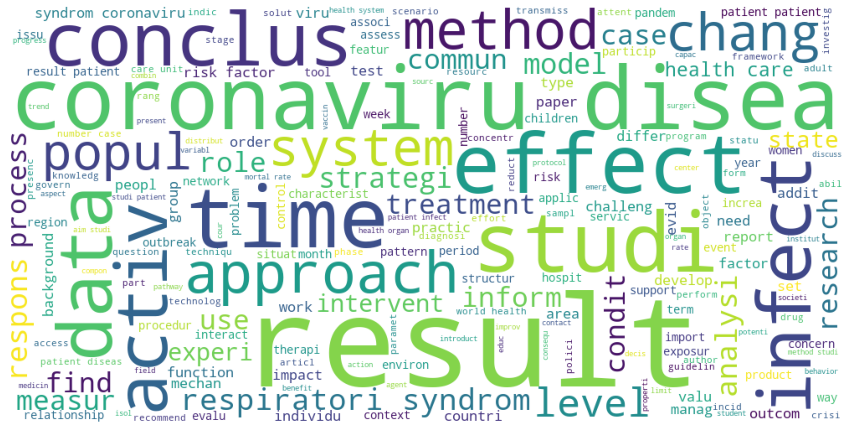

In [25]:
from wordcloud import WordCloud
unique_string=" ".join([ " ".join(tl) for tl in token_lists])
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

# 4. Define model object

In [13]:
import gensim
from gensim import corpora, models
# from gensim.test.utils import datapath

In [20]:
# create dictionary from token lists.
dictionary = corpora.Dictionary(token_lists)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in token_lists]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [21]:
def create_lda(corp, dict, ntopic, saved_file_name):
    """
    A function to create LDA model.
    :param corp: document-term matrix created from token_lists.
    :param dict: dictionary created from token lists.
    :param ntopic: number of topics.
    :param saved_file_name: the file name for saving the LDA model.
    :return
    """
    model = gensim.models.ldamodel.LdaModel(corp,
                                           num_topics=ntopic,
                                           random_state=66,
                                           id2word=dict , passes=20)
    model.save(saved_file_name)
    return model

lda_model = create_lda(corp=corpus, dict=dictionary, ntopic=100, saved_file_name="LDA_model.gensim")

In [15]:
# Load data and model.

# samp_pd = pd.read_pickle("samp_pd.pkl")
# dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
# corpus = pickle.load(open('corpus.pkl', 'rb'))
# lda_model = gensim.models.ldamodel.LdaModel.load("LDA_model.gensim")

# 5. Post-analysis
Print topics as keywords.

In [23]:
for topic in lda_model.print_topics(num_topics=100):
    print(topic)

(0, '0.136*"trial" + 0.075*"treatment" + 0.055*"intervent" + 0.044*"efficaci" + 0.038*"safeti" + 0.035*"studi" + 0.034*"effect" + 0.029*"protocol" + 0.021*"particip" + 0.019*"outcom"')
(1, '0.122*"studi" + 0.077*"review" + 0.048*"evid" + 0.036*"literatur" + 0.024*"result" + 0.023*"databas" + 0.019*"data" + 0.017*"use" + 0.017*"effect" + 0.017*"search"')
(2, '0.112*"water" + 0.052*"equat" + 0.040*"constraint" + 0.039*"million" + 0.039*"thousand" + 0.030*"direct" + 0.028*"epicent" + 0.026*"argument" + 0.024*"misinform" + 0.023*"hundr"')
(3, '0.205*"surgeri" + 0.162*"event" + 0.065*"surgeon" + 0.023*"tube" + 0.017*"prophylaxi" + 0.015*"elig" + 0.013*"placement" + 0.011*"cancel" + 0.010*"number" + 0.010*"sc"')
(4, '0.079*"research" + 0.034*"search" + 0.028*"articl" + 0.027*"public" + 0.026*"inform" + 0.024*"paper" + 0.021*"review" + 0.020*"topic" + 0.020*"literatur" + 0.016*"analysi"')
(5, '0.127*"issu" + 0.066*"societi" + 0.041*"interview" + 0.032*"disinfect" + 0.029*"contagion" + 0.028*"

The Dominant topic and its percentage contribution in each document

In [29]:
def dominant_topic(ldamodel, corp, texts, saved_file_name):
    """
    Determine the dominant topic and its percentage contribution in each documents.
    :param ldamodel: LDA model.
    :param corp: corpus.
    :param texts: Documents.
    :param saved_file_name: The file name for saving the dataframe.
    :return: A dataframe having the dominant topic, topic percentage contribution, keywords, and Abstract.
    """
    topic_df = pd.DataFrame()
    for i, row_list in enumerate(ldamodel[corp]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        if row:
            topic_num,prop_topic = row[0]
            topic_keywords = ", ".join([word for word, prop in ldamodel.show_topic(topic_num)])
            topic_df = topic_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
        else:
           topic_df = topic_df.append(pd.Series([10000, round(0.0,4), ""]), ignore_index=True)
    topic_df = pd.concat([topic_df, texts], axis=1)
    topic_df.columns = ['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Abstract']
    topic_df.to_pickle(saved_file_name)
    return topic_df

text_topic_df = dominant_topic(ldamodel=lda_model, corp=corpus, texts=samp_pd.Abstract,saved_file_name="text_topics.pkl")
text_topic_df.head(3)

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Abstract
0,47.0,0.1526,"patient, lung, ct, pneumonia, find, chest, ima...",BACKGROUND: Different skin manifestations of C...
1,7.0,0.2060,"countri, case, number, rate, death, region, tr...",SARS-CoV-2 is the cause of the worldwide outbr...
2,9.0,0.1703,"qualiti, dose, consumpt, administr, improv, re...",BACKGROUND: Multiple professional bodies have ...


Find the most representative abstract for each topic

In [31]:
def topic_reprst(text_topic):
    """
    Find the most representative abstract for each topic.
    :param text_topic: A dataframe for topic distribution in each text.
    :return: A dataframe having the most representative abstract for each topic.
    """
    pd.options.display.max_colwidth = 100
    topic_representative_text = pd.DataFrame()
    for i, grp in text_topic.groupby('Dominant_Topic'):
        topic_representative_text = topic_representative_text.append(
            grp.sort_values(['Topic_Perc_Contrib'], ascending=False).iloc[0])
    topic_representative_text.reset_index(drop=True, inplace=True)
    topic_representative_text.columns = ["Representative Text","Topic_Num", "Keywords", "Topic_Perc_Contrib"]
    return topic_representative_text

topic_representative_text_pd = topic_reprst(text_topic_df)
topic_representative_text_pd.head(10)

,Representative Text,Topic_Num,Keywords,Topic_Perc_Contrib
0,Introduction: Many clinical trials are ongoing in India to evaluate the efficacy and safety of v...,0.0,"trial, treatment, intervent, efficaci, safeti, studi, effect, protocol, particip, outcom",0.7138
1,Data sources The authors of this rapid review did not disclose which electronic databases were i...,1.0,"studi, review, evid, literatur, result, databas, data, use, effect, search",0.8107
2,"It would be nice to be able to say otherwise, but the UK’s approach to testing in this covid-19 ...",2.0,"water, equat, constraint, million, thousand, direct, epicent, argument, misinform, hundr",0.5640
3,Two major sealing events scheduled to take place in October this year have been affected by the ...,3.0,"surgeri, event, surgeon, tube, prophylaxi, elig, placement, cancel, number, sc",0.5127
4,INTRODUCTION: The COVID-19 pandemic is having a deep impact on our surgical practice and scienti...,4.0,"research, search, articl, public, inform, paper, review, topic, literatur, analysi",0.7738
5,The articles in this special issues address the role of computing in battling with the COVID-19 ...,5.0,"issu, societi, interview, disinfect, contagion, practic, articl, instrument, domain, form",0.8020
6,"Background Early in the COVID-19 pandemic, it was noted that males seemed to be more affected th...",6.0,"concentr, male, femal, sex, hepat, profil, malaria, translat, differ, cfr",0.5439
7,OBJECTIVE: To estimate the reporting rates of coronavirus disease 2019 (COVID-19) cases for Braz...,7.0,"countri, case, number, rate, death, region, travel, march, measur, itali",0.9635
8,The COVID-19 pandemic has disrupted the global food supply chain and exacerbated the problem of ...,8.0,"food, suppli, corticosteroid, choic, chain, toll, product, flight, impact, flu",0.6299
9,BACKGROUND AND OBJECTIVES: A drug repurposing strategy is an approach for identifying new therap...,9.0,"qualiti, dose, consumpt, administr, improv, remdesivir, rat, effect, intak, tocilizumab",0.5998


In [35]:
print(topic_representative_text_pd.iloc[42])

Representative Text    In a time of unprecedented and rapid change, what are the roles of librarians and archivists in ...
Topic_Num                                                                                                               42
Keywords                                      student, educ, school, univers, learn, experi, cours, skill, opportun, onlin
Topic_Perc_Contrib                                                                                                   0.802
Name: 42, dtype: object


Use pyLDAvis tool to perform visualization.

In [16]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.095146 -0.184751       1        1  17.814921
9     -0.127059  0.101178       2        1  13.374855
7     -0.110278 -0.034809       3        1  12.360494
8      0.003951  0.217670       4        1  11.127630
3     -0.198272  0.032742       5        1  10.780946
2     -0.007209 -0.044755       6        1  10.230296
4     -0.053054  0.117373       7        1   6.925524
6      0.250499  0.097251       8        1   6.325432
0      0.307491 -0.045283       9        1   6.259486
5      0.029079 -0.256616      10        1   4.800416, topic_info=           Term          Freq         Total Category  logprob  loglift
31      patient  73866.000000  73866.000000  Default  30.0000  30.0000
49         cell  13347.000000  13347.000000  Default  29.0000  29.0000
397        care  17719.000000  17719.000000  Default  28.0000  28.0000
105      infect  27134.000000  27134.000000  Default  27.0000  27.0000
103      diseas  36161.000000  36161.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
226         day   1319.201482   9674.221131  Topic10  -4.6552   1.0440
71        studi   1822.721770  36825.050236  Topic10  -4.3319   0.0306
164  coronaviru   1330.066452  21629.103768  Topic10  -4.6470   0.2477
31      patient   1538.800898  73866.042767  Topic10  -4.5012  -0.8348
266       blood    933.304720   3834.134913  Topic10  -5.0013   1.6235

[740 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6167      9  0.995581        ab
576       1  0.961104    abnorm
576       9  0.038305    abnorm
6397      7  0.993964  abstract
1340      9  0.996531     abund
...     ...       ...       ...
99        3  0.170940      year
99        4  0.045823      year
99        6  0.038042      year
99        7  0.035571      year
99        8  0.001606      year

[1615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 8, 9, 4, 3, 5, 7, 1, 6])